# 1) Euler Explícito

En el siguiente código disponible en *EulerExplicito.m* se muestra como programar de forma simple el método de Euler Explícito. El esquema de programación sirve para cualquier método de un paso. Aquí lo aplicamos al problema:

$y'(t) =-a\cdot y(t), \quad t\in [0,3]$

$y(0) = 1$

Cuya solución es $y(t) = e^{-at}$

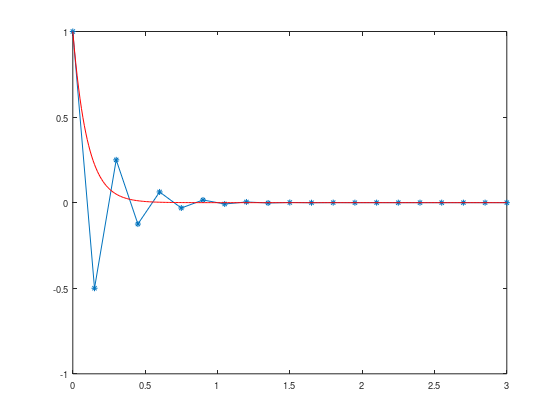

In [5]:
## addpath('./Biblioteca')

clear all;
t0=0;
T=3;
y0=1;
N=20; # Número de particiones
h=T/N;
a=10;
t=t0:h:t0+T;
y=zeros(N+1,1);
y(1)=y0;
true=t0:0.01:t0+T;
 %ztrue=true.^2/2;
 ztrue=exp(-a*true);
for j=1:N
    y(j+1)=y(j)+h*mifun(a,t(j),y(j));
end
figure(1);
plot(t,y,'*-',true,ztrue,'r-');

El archivo *mifun.m* es:

In [5]:
function dydt=mifun(aa,tt,yy)
    dydt=tt;
    dydt=-aa*yy;
    end

# 2) Runge-Kutta

En el código *RK4vsEulerExplicitoOrdenes.m* se muestra la programacion del
método de Runge-Kutta clásico y la del método de Euler explícito. Se obtienen
además las curvas de pendientes de cada uno de los métodos comprobandose así
que el método de Runge-Kutta clásico posee orden 4 mientras que Euler explícito
orden 1. Se aplican ambos al problema

$y'(t) =\lambda \cos (\lambda t)y(t), \quad t\in [0,20]$

$y(0) = y_0$

cuya solución es $y(t) = y_0e^{sin(\lambda t)}$ con $y_0 = 2$ y $\lambda = 7$. Esta solución es oscilante y
necesita precisión para poder ser calculada. Se puede usar *dfield.jar* para observar
el comportamiento del campo de vectores y sus soluciones

Errores: N= 20 Euler = 7335.7614 RK4 = 5.9934
Errores: N= 40 Euler = 114.3069 RK4 = 4.1108
Errores: N= 80 Euler = 5.4361 RK4 = 0.31138
Errores: N= 160 Euler = 5.3642 RK4 = 0.0079777
Errores: N= 320 Euler = 4.9403 RK4 = 0.00027422
Errores: N= 640 Euler = 3.7562 RK4 = 1.1112e-05
Errores: N= 1280 Euler = 2.4051 RK4 = 5.1623e-07


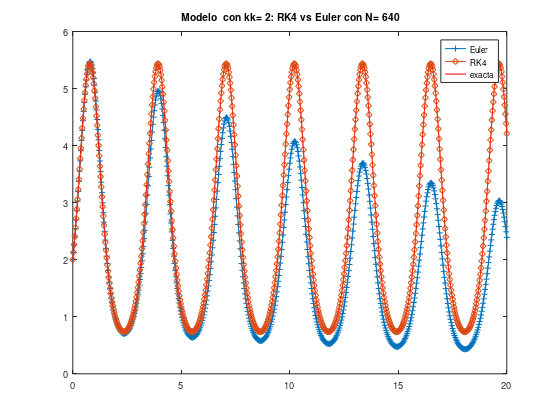

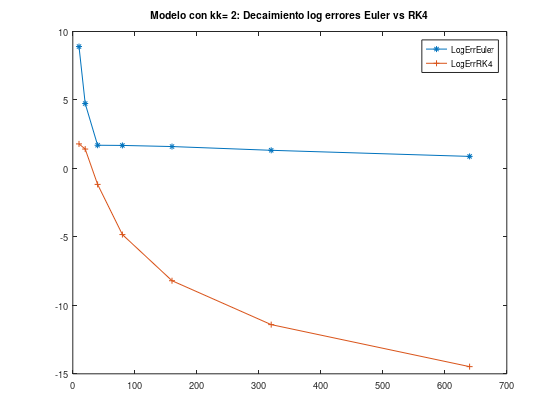

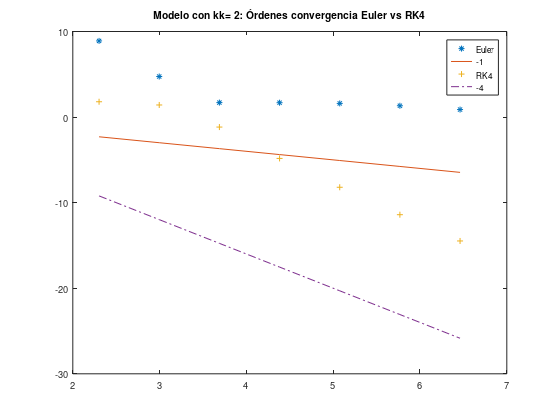

In [11]:
%
% Contrastamos Runge-Kutta de orden 4 con Euler explicito
% estimamos los ordenes 
% de convergencia usando las rectas de pendiente
%

t0=0; %Tiempo inicial
tf=20;  %Tiempo final
T=tf-t0;% Tiempo total
y0=2; %Dato inicial
%Datos para la solucion exacta
kk=2;
% Solucion exacta en una particion fina
ttrue=t0:0.001:t0+T; %Particion fina
ytrue=y0*exp(sin(kk*ttrue));
%
% Numero de calculos a realizar
%
M=7;
nP=zeros(1,M);% guarda el numero de puntos de la particion en cada calculo
errEuler=zeros(1,M); %guarda el error obtenido con Euler
errRK=zeros(1,M); %guarda el error obtenido con RK4
%
% Numero de puntos iniciales
%
N=10;
for j=1:M  
    nP(j)=N;% Se guarda el numero de puntos a usar 
    h=T/N; % Talla de la particion
    t=t0:h:t0+T; %Particion
    h=T/N;% talla de la particion
% Vector para Runge-Kutta orden 4
    yRK=zeros(1,N+1);% dimensionaliza t e y 
    yRK(1)=y0;
% Vector para Euler orden 1
    yEuler=zeros(1,N+1);% dimensionaliza t e y 
    yEuler(1)=y0;
% Solucion exacta en la particion 
    yt=y0*exp(sin(kk*t));

    for n=1:N
        %Calculo RK
        k1=mifun2(kk,t(n),yRK(n));
        k2=mifun2(kk,t(n)+h/2,yRK(n)+h/2*k1);
        k3=mifun2(kk,t(n)+h/2,yRK(n)+h/2*k2);
        k4=mifun2(kk,t(n)+h,yRK(n)+h*k3);
        yRK(n+1)=yRK(n)+h*(k1+2*k2+2*k3+k4)/6;
        %Calculo Euler
        yEuler(n+1)=yEuler(n)+h*mifun2(kk,t(n),yEuler(n));
    end 


    figure(1);
    plot(t,yEuler,'+-',t,yRK,'d-',ttrue,ytrue,'r-');
    legend('Euler','RK4','exacta','Location','Best');
    title([' Modelo  con kk= ',num2str(kk),...
        ': RK4 vs Euler con N= ',num2str(N)]);
    errEuler(j)=max(abs(yEuler-yt));
    errRK(j)=max(abs(yRK-yt));
    pause(0.1); 
    N=2*N; %duplicamos N
    disp(['Errores: N= ',num2str(N),' Euler = ',num2str(errEuler(j)),...
        ' RK4 = ',num2str(errRK(j))])
    pause(0.1);
end



%
% Visualizamos ahora los datos globales del calculo
%
figure(2)
plot(nP,log(errEuler),'-*',nP,log(errRK),'-+');
legend('LogErrEuler','LogErrRK4','Location','Best');
title([' Modelo con kk= ',num2str(kk),...
       ': Decaimiento log errores Euler vs RK4 ']);
       

figure(3)
plot(log(nP),log(errEuler),'*',log(nP),-log(nP),'-',...
    log(nP),log(errRK),'+',log(nP),-4*log(nP),'-.');
legend('Euler','-1','RK4','-4','Location','Best');
title([' Modelo con kk= ',num2str(kk),...
       ': Órdenes convergencia Euler vs RK4 ']);
   

# Ejercicio 3)

Resolución de un sistema lineal 2d usando herramientas matriciales de Matlab o de
Octave. El problema es:

$u' = 9u + 24v +5\cos(t) - \frac{1}{3}\sin(t), \quad u(0) = 4/3$

$v' = -24u -51v -9\cos(t) + \frac{1}{3}\sin(t), \quad v(0) = 2/3$


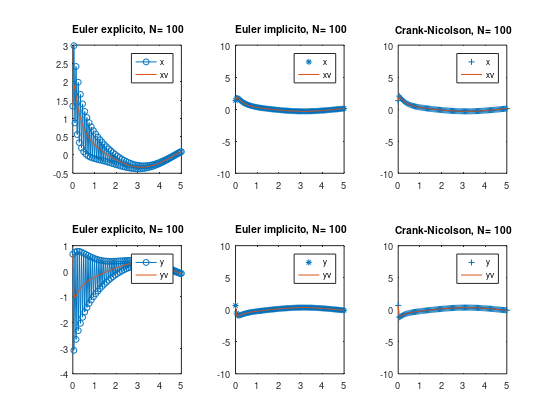

In [12]:
clear all;
T=5;
N=100;
x0=1;
y0=2;
h=T/N;
t=[0:h:T];
x0=4/3;
y0=2/3;
%
% Solucion exacta
%
xv=2*exp(-3*t)-exp(-39*t)+cos(t)/3;
yv=-exp(-3*t)+2*exp(-39*t)-cos(t)/3;
x=zeros(N+1,1);
y=zeros(N+1,1);
x(1)=x0;
y(1)=y0;
h=T/N;
ejes=[0 T -10 10];
%
% Matriz del sistema
%
A=[9 24;-24 -51];
%
% Matriz identidad
%
I=[1 0;0 1];
%
% Matriz de iteracion para Euler explicito
%
Me=I+h*A;
%
% Inicio computo con Euler explicito
%
v=[x(1);y(1)];
for i=1:N
    v=Me*v+h*[f1(t(i));f2(t(i))];
    x(i+1)=v(1);
    y(i+1)=v(2);
end
figure(1);
subplot(2,3,1),plot(t,x,'-o',t,xv,'-');
title([' Euler explicito, N= ',num2str(N)]);
legend('x','xv','location','Best');
%axis(ejes);
subplot(2,3,4),plot(t,y,'-o',t,yv,'-');
title([' Euler explicito, N= ',num2str(N)]);
legend('y','yv','location','Best');%axis(ejes);
%axis(ejes);
%
% Matriz de iteracion para Euler implicito
%
Mi=I-h*A;
%
% Inicio computo con Euler implicito
%
v=[x(1);y(1)];
for i=1:N  
    v=Mi\(v+h*[f1(t(i+1));f2(t(i+1))]);
    x(i+1)=v(1);
    y(i+1)=v(2);
end
subplot(2,3,2),plot(t,x,'*',t,xv,'-');
title([' Euler implicito, N= ',num2str(N)]);
legend('x','xv','location','Best');
axis(ejes);
subplot(2,3,5),plot(t,y,'*',t,yv,'-');
title([' Euler implicito, N= ',num2str(N)]);
legend('y','yv','location','Best');
axis(ejes);
%
% Matriz de iteracion para Crank-Nicolson
%
MCN=I-0.5*h*A;
MCNaux=I+0.5*h*A;
%
% Inicio computo con Crank-Nicolson
%
v=[x(1);y(1)];
for i=1:N   
    v=MCN\(MCNaux*v+0.5*h*[f1(t(i+1))+f1(t(i));f2(t(i+1))+f2(t(i))]);
    x(i+1)=v(1);
    y(i+1)=v(2);
end
subplot(2,3,3),plot(t,x,'+',t,xv,'-');
title([' Crank-Nicolson, N= ',num2str(N)]);
legend('x','xv','location','Best');
axis(ejes);
subplot(2,3,6),plot(t,y,'+',t,yv,'-');
title([' Crank-Nicolson, N= ',num2str(N)]);
legend('y','yv','location','Best');
axis(ejes);


# 4) Sistema 2D No Homogéneo

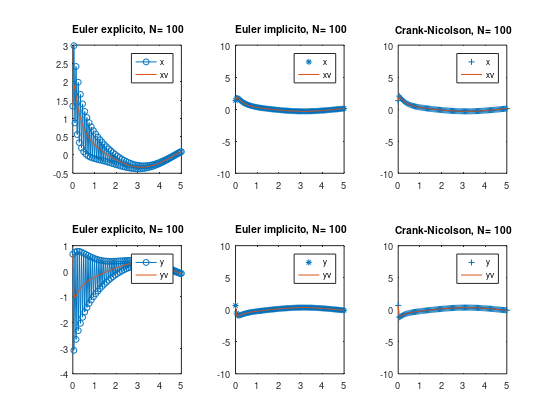

In [13]:
clear all;
T=5;
N=100;
x0=1;
y0=2;
h=T/N;
t=[0:h:T];
x0=4/3;
y0=2/3;
%
% Solucion exacta
%
xv=2*exp(-3*t)-exp(-39*t)+cos(t)/3;
yv=-exp(-3*t)+2*exp(-39*t)-cos(t)/3;
x=zeros(N+1,1);
y=zeros(N+1,1);
x(1)=x0;
y(1)=y0;
h=T/N;
ejes=[0 T -10 10];
%
% Matriz del sistema
%
A=[9 24;-24 -51];
%
% Matriz identidad
%
I=[1 0;0 1];
%
% Matriz de iteracion para Euler explicito
%
Me=I+h*A;
%
% Inicio computo con Euler explicito
%
v=[x(1);y(1)];
for i=1:N
    v=Me*v+h*[f1(t(i));f2(t(i))];
    x(i+1)=v(1);
    y(i+1)=v(2);
end
figure(1);
subplot(2,3,1),plot(t,x,'-o',t,xv,'-');
title([' Euler explicito, N= ',num2str(N)]);
legend('x','xv','location','Best');
%axis(ejes);
subplot(2,3,4),plot(t,y,'-o',t,yv,'-');
title([' Euler explicito, N= ',num2str(N)]);
legend('y','yv','location','Best');%axis(ejes);
%axis(ejes);
%
% Matriz de iteracion para Euler implicito
%
Mi=I-h*A;
%
% Inicio computo con Euler implicito
%
v=[x(1);y(1)];
for i=1:N  
    v=Mi\(v+h*[f1(t(i+1));f2(t(i+1))]);
    x(i+1)=v(1);
    y(i+1)=v(2);
end
subplot(2,3,2),plot(t,x,'*',t,xv,'-');
title([' Euler implicito, N= ',num2str(N)]);
legend('x','xv','location','Best');
axis(ejes);
subplot(2,3,5),plot(t,y,'*',t,yv,'-');
title([' Euler implicito, N= ',num2str(N)]);
legend('y','yv','location','Best');
axis(ejes);
%
% Matriz de iteracion para Crank-Nicolson
%
MCN=I-0.5*h*A;
MCNaux=I+0.5*h*A;
%
% Inicio computo con Crank-Nicolson
%
v=[x(1);y(1)];
for i=1:N   
    v=MCN\(MCNaux*v+0.5*h*[f1(t(i+1))+f1(t(i));f2(t(i+1))+f2(t(i))]);
    x(i+1)=v(1);
    y(i+1)=v(2);
end
subplot(2,3,3),plot(t,x,'+',t,xv,'-');
title([' Crank-Nicolson, N= ',num2str(N)]);
legend('x','xv','location','Best');
axis(ejes);
subplot(2,3,6),plot(t,y,'+',t,yv,'-');
title([' Crank-Nicolson, N= ',num2str(N)]);
legend('y','yv','location','Best');
axis(ejes);